In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib widget

In [2]:
from MITHRA import *

In [21]:
import importlib
importlib.reload(spec)
importlib.reload(tracks)

<module 'MITHRA.tracks' from '/Users/nichollsh/Projects/MITHRA/MITHRA/tracks.py'>

In [4]:
tr = tracks.read_bhac()

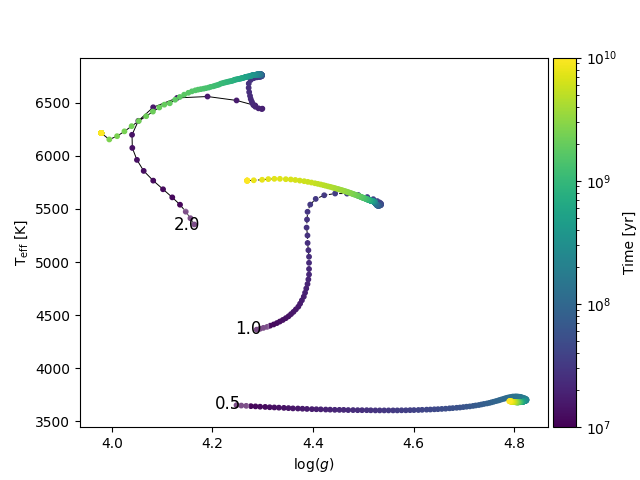

In [5]:
times = np.logspace(7,10,200)
cmap= plt.cm.viridis
norm = mpl.colors.LogNorm(vmin=times[0], vmax=times[-1]) 
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)    
sm.set_array([])  

plt.close("all")
fig,ax = plt.subplots(1,1)

mass = 0.5
masses = [0.5, 1.0, 2.0]
styles = ["dotted", "dashed", "solid"]
for i in range(len(masses)):
    teffs = []
    loggs = []
    mass = masses[i]
    for age in times:
        vals = tracks.get_params_bhac(tr, mass, age, ["Teff","logg"])
        teffs.append(vals[0])
        loggs.append(vals[1])
    ax.plot(loggs, teffs, color='k', lw=0.7, linestyle=styles[i])
    ax.scatter(loggs, teffs, c=times, cmap=cmap, norm=norm, s=10, zorder=3)
    ax.text(loggs[0]*0.99, teffs[0]*0.99, "%.1f"%mass, backgroundcolor=(1.0, 1.0, 1.0, 0.3), fontsize=12)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', label='Time [yr]')  

ax.set(xlabel="log($g$)", ylabel=r"T$_{\text{eff}}$ [K]")
plt.show()

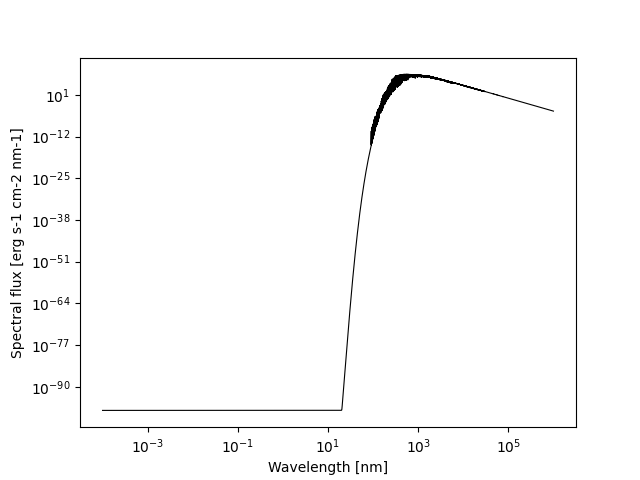

In [20]:
out = tracks.get_params_bhac(tr, 1.0, 1.0e7, ["Teff","logg"])
wl, fl = spec.get_spec_from_npy(out[0], out[1])

fig,ax = plt.subplots()

ax.plot(wl,fl, lw=0.8, color='black')

spec.write_csv("output/test.csv", wl, fl)

ax.set(xscale="log", yscale="log")
ax.set(xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
plt.show()    

In [7]:
itp = spec.create_interp(num_wl=40, num_teff=80, num_logg=50, teff_lims=(2e3, 6e3))

Reading npy files...
    done
Source axes: (teff, logg, wave) = (45, 7, 80)
Interpolation target: (teff, logg, wave) = (80, 50, 40)
Meshgrid
Interpolating...
    please wait
    done


In [8]:
print(np.shape(itp[0]))

(80, 50, 40)


In [25]:
ds = spec.create_dataset(itp)
spec.write_dataset(ds, "output/interp.nc")

In [26]:
v,x,y,z = itp[0],itp[1],itp[2],itp[3]
sh = np.shape(v)

2759.493670886076 4.336734693877551


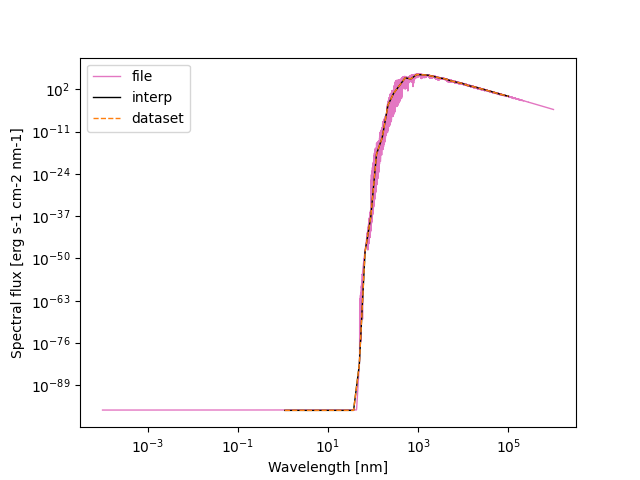

In [27]:
plt.close("all")
fig,ax = plt.subplots(1,1)

i = 15
j = 30
teff = x[i,j,0]
logg = y[i,j,0]

print(teff, logg)

wl, fl = spec.get_spec_from_npy(x[i,j,0], y[i,j,0])
ax.plot(wl,fl,label="file", lw=1, color='tab:pink')

ax.plot(z[i,j,:],v[i,j,:],label="interp",lw=1, color='k')

wl,fl,t,l = spec.get_spec_from_dataset(ds, teff, logg)
ax.plot(wl,fl,label="dataset", lw=1, color='tab:orange' ,linestyle='dashed')

ax.set(xscale="log",yscale="log", xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.legend()
plt.show()

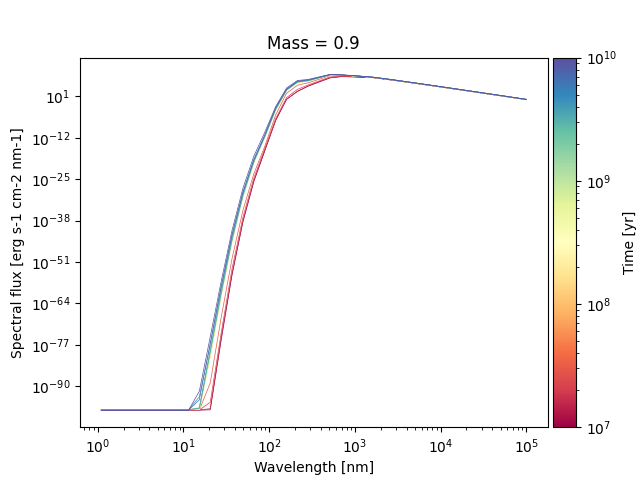

In [28]:
fig,ax = plt.subplots(1,1)

tarr = np.logspace(7,10,20)

mass = 0.9

cmap= plt.cm.Spectral
norm = mpl.colors.LogNorm(vmin=tarr[0], vmax=tarr[-1]) 
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)    
sm.set_array([])  

for time in tarr:

    out = tracks.get_params_bhac(tr, mass, time, ["Teff","logg"])
    c = cmap(norm(time))
    
    w,f,t,l = spec.get_spec_from_dataset(ds,out[0],out[1])
    ax.plot(w,f, color=c, alpha=1.0, lw=0.5, zorder=3)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', label='Time [yr]')  

ax.set(xscale="log", yscale="log")
ax.set(xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.set_title("Mass = %g"%mass)

plt.show()